## CLs Technique and Persistence Entropy in Searching for $H\to gg$ in Boosted ZH at HL-LHC

In [1]:
import glob
import os
import h5py
import numpy as np

def find_cached_outputs(training_name: str, data_file: str = "") -> str | None:
    """Return path to (most recently computed) cached outputs for a model, data file.

    Args:
        training_name: string name of training run (by default has timestamp)
        data_file: data file outputs are cached for (e.g. all_jets_test)
    Returns:
        string name or None if no file path exists
    """
    file_prefix = f"{os.getenv('GLUTAG_DATA_PATH')}/comet_logs/{training_name}/ckpts/"
    h5_files = glob.glob(f"{file_prefix}*{data_file}.h5")
    if len(h5_files) == 0:
        return None
    most_recent_h5 = max(h5_files, key=os.path.getctime)
    return most_recent_h5


def get_tagger_outs(training_name: str, data_file: str = "") -> np.ndarray:
    """Return tagger outs as array of jet-info for a given trained tagger instance.

    Requires that the inference outs have already been cached by running salt test for the file

    Args:
        training_name: name of training run (by default has timestamp)
        data_file: data file outputs are cached for (e.g. all_jets_test)
    Returns:
        numpy array containing inference outs jets object
    """
    file_path = find_cached_outputs(training_name, data_file)
    arr = None
    with h5py.File(file_path) as f:
        arr = f["jets"][()]
    return arr

sig_out = get_tagger_outs("glutag_3_12", "sig_zh_lo_250GeV_14TeV_test")
zjet_out = get_tagger_outs("glutag_3_12", "bkg_zjets_lo_250GeV_14TeV_test")
zhbb_out = get_tagger_outs("glutag_3_12", "bkg_zhbb_lo_250GeV_14TeV_test")
zhcc_out = get_tagger_outs("glutag_3_12", "bkg_zhcc_lo_250GeV_14TeV_test")
zh4q_out = get_tagger_outs("glutag_3_12", "bkg_zh4q_lo_250GeV_14TeV_test")
zzqq_out = get_tagger_outs("glutag_3_12", "bkg_zzqq_lo_250GeV_14TeV_test")
zwqq_out = get_tagger_outs("glutag_3_12", "bkg_zwqq_lo_250GeV_14TeV_test")
tt_out = get_tagger_outs("glutag_3_12", "bkg_tt_lo_250GeV_14TeV_test")



In [2]:
def find_highest_scores_by_event(sig_out):
    """
    Finds the highest score for jets within the same event, given a signal output array.
    
    Parameters:
    - sig_out (dict-like): Object containing 'event_idx' and 'glutag_phgg' keys.
    
    Returns:
    - (numpy.array, numpy.array): Tuple of two arrays:
        - The unique event indices.
        - The highest score for each event.
    """
    # Extract arrays from the input object.
    idx = np.array(sig_out['event_idx'])
    score = np.array(sig_out['glutag_phgg'])
    
    unique_event_indices = []
    max_scores = []

    current_event_idx = None
    current_max_score = -np.inf

    for i in range(len(idx)):
        if idx[i] != current_event_idx:
            if current_event_idx is not None:
                unique_event_indices.append(current_event_idx)
                max_scores.append(current_max_score)
            current_event_idx = idx[i]
            current_max_score = score[i]
        else:
            if score[i] > current_max_score:
                current_max_score = score[i]

    # Add the last event's max score.
    unique_event_indices.append(current_event_idx)
    max_scores.append(current_max_score)

    return np.array(unique_event_indices), np.array(max_scores)

In [3]:
sig_event_indices, sig_max_scores = find_highest_scores_by_event(sig_out)
zjet_event_indices, zjet_max_scores = find_highest_scores_by_event(zjet_out)
zhbb_event_indices, zhbb_max_scores = find_highest_scores_by_event(zhbb_out)
zhcc_event_indices, zhcc_max_scores = find_highest_scores_by_event(zhcc_out)
zh4q_event_indices, zh4q_max_scores = find_highest_scores_by_event(zh4q_out)
zzqq_event_indices, zzqq_max_scores = find_highest_scores_by_event(zzqq_out)
zwqq_event_indices, zwqq_max_scores = find_highest_scores_by_event(zwqq_out)
tt_event_indices, tt_max_scores = find_highest_scores_by_event(tt_out)

In [4]:
# Print the length of the max scores array for each channel
print("Length of sig_max_scores:", len(sig_max_scores))
print("Length of zjet_max_scores:", len(zjet_max_scores))
print("Length of zhbb_max_scores:", len(zhbb_max_scores))
print("Length of zhcc_max_scores:", len(zhcc_max_scores))
print("Length of zh4q_max_scores:", len(zh4q_max_scores))
print("Length of zzqq_max_scores:", len(zzqq_max_scores))
print("Length of zwqq_max_scores:", len(zwqq_max_scores))
print("Length of tt_max_scores:", len(tt_max_scores))


Length of sig_max_scores: 94933
Length of zjet_max_scores: 48806
Length of zhbb_max_scores: 24128
Length of zhcc_max_scores: 28282
Length of zh4q_max_scores: 36209
Length of zzqq_max_scores: 24711
Length of zwqq_max_scores: 24888
Length of tt_max_scores: 4784


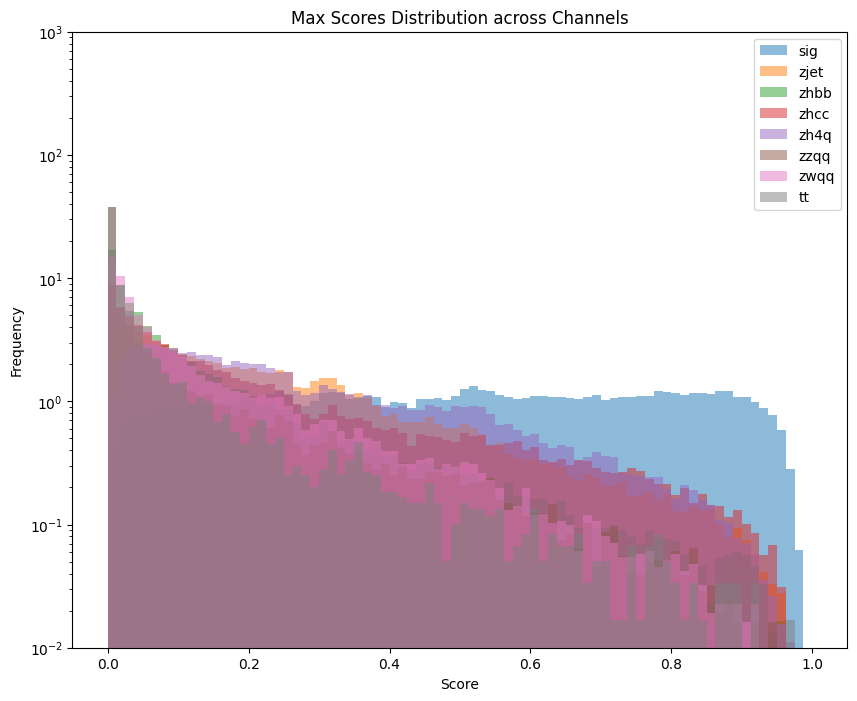

In [28]:

import matplotlib.pyplot as plt

bins = 80

# Create histograms for each channel
plt.figure(figsize=(10, 8))

# Signal
plt.hist(sig_max_scores, bins=bins, range=(0,1), alpha=0.5, label='sig', density=True)
# Z+Jets
plt.hist(zjet_max_scores, bins=bins, range=(0,1), alpha=0.5, label='zjet', density=True)
# ZH+bb
plt.hist(zhbb_max_scores, bins=bins, range=(0,1), alpha=0.5, label='zhbb', density=True)
# ZH+cc
plt.hist(zhcc_max_scores, bins=bins, range=(0,1), alpha=0.5, label='zhcc', density=True)
# ZH+4q
plt.hist(zh4q_max_scores, bins=bins, range=(0,1), alpha=0.5, label='zh4q', density=True)
# ZZ+qq
plt.hist(zzqq_max_scores, bins=bins, range=(0,1), alpha=0.5, label='zzqq', density=True)
# ZW+qq
plt.hist(zwqq_max_scores, bins=bins, range=(0,1), alpha=0.5, label='zwqq', density=True)
# TT
plt.hist(tt_max_scores, bins=bins, range=(0,1), alpha=0.5, label='tt', density=True)

# Adding legend
plt.legend()

# Setting titles
plt.title("Max Scores Distribution across Channels")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.yscale('log')
plt.ylim([1e-2, 1e+3])
# Show the plot
plt.show()

In [5]:
import ROOT
import numpy as np
import pyhf
from pyhf.contrib.viz import brazil
import matplotlib.pyplot as plt

nbins = 80
xmin, xmax = 0, 1

# Create a histogram for each channel with variable number of bins and range
sig_hist = ROOT.TH1F("sig_hist", "Signal", nbins, xmin, xmax)
zjet_hist = ROOT.TH1F("zjet_hist", "Z+Jets", nbins, xmin, xmax)
zhbb_hist = ROOT.TH1F("zhbb_hist", "ZH+bb", nbins, xmin, xmax)
zhcc_hist = ROOT.TH1F("zhcc_hist", "ZH+cc", nbins, xmin, xmax)
zh4q_hist = ROOT.TH1F("zh4q_hist", "ZH+4q", nbins, xmin, xmax)
zzqq_hist = ROOT.TH1F("zzqq_hist", "ZZ+qq", nbins, xmin, xmax)
zwqq_hist = ROOT.TH1F("zwqq_hist", "ZW+qq", nbins, xmin, xmax)
tt_hist = ROOT.TH1F("tt_hist", "TT", nbins, xmin, xmax)

# Function to fill the histograms from numpy arrays
def fill_hist_from_numpy(hist, data):
    for value in data:
        hist.Fill(value)

# Fill the histograms with max scores
fill_hist_from_numpy(sig_hist, sig_max_scores)
fill_hist_from_numpy(zjet_hist, zjet_max_scores)
fill_hist_from_numpy(zhbb_hist, zhbb_max_scores)
fill_hist_from_numpy(zhcc_hist, zhcc_max_scores)
fill_hist_from_numpy(zh4q_hist, zh4q_max_scores)
fill_hist_from_numpy(zzqq_hist, zzqq_max_scores)
fill_hist_from_numpy(zwqq_hist, zwqq_max_scores)
fill_hist_from_numpy(tt_hist, tt_max_scores)

xmin = 0.0
xmax = 1.0

# # Rebin the histograms with the same binning
# bkg_hist.Rebin(nbins, f"sig_rebinned", np.linspace(xmin, xmax, nbins + 1))
# bkg_hist.Rebin(nbins, f"bkg_rebinned", np.linspace(xmin, xmax, nbins + 1))

# Extract the bin contents into NumPy arrays
sig_array = np.zeros(nbins)
zjet_array = np.zeros(nbins)
zhbb_array = np.zeros(nbins)
zhcc_array = np.zeros(nbins)
zh4q_array = np.zeros(nbins)
zzqq_array = np.zeros(nbins)
zwqq_array = np.zeros(nbins)
tt_array = np.zeros(nbins)

sig_array_unc = np.zeros(nbins)
zjet_array_unc = np.zeros(nbins)
zhbb_array_unc = np.zeros(nbins)
zhcc_array_unc = np.zeros(nbins)
zh4q_array_unc = np.zeros(nbins)
zzqq_array_unc = np.zeros(nbins)
zwqq_array_unc = np.zeros(nbins)
tt_array_unc = np.zeros(nbins)

sigWeight = 0.0031132
zjetWeight = 92.79567345
zhbbWeight = 0.06324864
zhccWeight = 0.003139626
zh4qWeight = 0.01182654
zzqqWeight = 0.867
zwqqWeight = 0.9042
ttWeight = 231.579

for i in range(1, nbins + 1):    
    sig_array[i - 1] = sig_hist.GetBinContent(i-1) * sigWeight    
    zjet_array[i - 1] = zjet_hist.GetBinContent(i-1) * zjetWeight
    zhbb_array[i - 1] = zhbb_hist.GetBinContent(i-1) * zhbbWeight
    zhcc_array[i - 1] = zhcc_hist.GetBinContent(i-1) * zhccWeight    
    zh4q_array[i - 1] = zh4q_hist.GetBinContent(i-1) * zh4qWeight
    zzqq_array[i - 1] = zzqq_hist.GetBinContent(i-1) * zzqqWeight
    zwqq_array[i - 1] = zwqq_hist.GetBinContent(i-1) * zwqqWeight        
    tt_array[i - 1] = tt_hist.GetBinContent(i) * ttWeight

def combine_bins(arr):
    bin_lasttwo = np.sum(arr[nbins-2:nbins])
    return np.array(list(arr[0:nbins-2]) + [bin_lasttwo])

def recalculate_uncertainty(combined_array):
    return np.sqrt(combined_array)

zjet_array = combine_bins(zjet_array)
zjet_array_unc = recalculate_uncertainty(zjet_array)

zhbb_array = combine_bins(zhbb_array)
zhbb_array_unc = recalculate_uncertainty(zhbb_array)

zhcc_array = combine_bins(zhcc_array)
zhcc_array_unc = recalculate_uncertainty(zhcc_array)

zh4q_array = combine_bins(zh4q_array)
zh4q_array_unc = recalculate_uncertainty(zh4q_array)

zzqq_array = combine_bins(zzqq_array)
zzqq_array_unc = recalculate_uncertainty(zzqq_array)

zwqq_array = combine_bins(zwqq_array)
zwqq_array_unc = recalculate_uncertainty(zwqq_array)

#tt_array = combine_bins(tt_array)
#tt_array_unc = recalculate_uncertainty(tt_array)

sig_array = combine_bins(sig_array)
sig_array_unc = recalculate_uncertainty(sig_array)
sums_per_bin = sig_array + zjet_array + zhbb_array + zhcc_array + zh4q_array + zzqq_array + zwqq_array # + tt_array

# If you want to see the sum for each bin index:
for i, bin_sum in enumerate(sums_per_bin, start=1):
    print(f"Sum for bin {i-1}: {bin_sum}")
    
epsilon = 1e-9
bkg_array = zjet_array + zhbb_array + zhcc_array + zh4q_array + zzqq_array + zwqq_array# + tt_array
bkg_array_unc = np.sqrt(zjet_array_unc**2 + zhbb_array_unc**2 + zhcc_array_unc**2 + zh4q_array_unc**2 + zzqq_array_unc**2 + zwqq_array_unc**2 )#+ tt_array_unc**2
bkg_array = np.asarray(bkg_array) + epsilon

for idx in range(0,len(sig_array)):
    print(sig_array[idx] + bkg_array[idx])

def sample_sig_bkg(sig_mu, sig_unc, bkg_mu, bkg_unc):
    """Create sample data by sampling signal and background from mu, sigma.

    Assumes normal distribution for sampling.
    """
    res = []
    for mu1, sig1, mu2, sig2 in zip(sig_mu, sig_unc, bkg_mu, bkg_unc):
        val = np.random.normal(mu1, sig1) + np.random.normal(mu2, sig2)
        val = max(val, 1e-9)
        res.append(val)
    return res

model = pyhf.simplemodels.uncorrelated_background(
    signal=sig_array,
    bkg=bkg_array,
    bkg_uncertainty=bkg_array_unc,
)


sum_sig = np.sum(sig_array)
print("sig total:", sum_sig)

sum_bkg = np.sum(bkg_array)
print("bkg total:", sum_bkg)

#print(sig_array)
#print(bkg_array)
data = sample_sig_bkg(
    sig_array, sig_array_unc, bkg_array, bkg_array_unc
)
data = pyhf.tensorlib.astensor(data+ model.config.auxdata)

#print(data)

mu_tests = np.linspace(0, 30, 100)
(
    obs_limit,
    exp_limits,
    (poi_tests, tests),
) = pyhf.infer.intervals.upper_limits.upper_limit(
    data, model, mu_tests, level=0.05, return_results=True,
    par_bounds= [(0,40)]
)

print(obs_limit)
print(exp_limits)
fig, ax = plt.subplots(figsize=(10, 7))
artists = brazil.plot_results(mu_tests, tests, test_size=0.05, ax=ax)

Sum for bin 0: 0.0
Sum for bin 1: 174544.67935453999
Sum for bin 2: 239022.76437962
Sum for bin 3: 236137.93905981802
Sum for bin 4: 209276.98572886598
Sum for bin 5: 198055.451610216
Sum for bin 6: 171932.96634871198
Sum for bin 7: 162507.862531708
Sum for bin 8: 155485.397582984
Sum for bin 9: 138694.95569606798
Sum for bin 10: 132517.317083536
Sum for bin 11: 126449.39289570799
Sum for bin 12: 121118.51173883199
Sum for bin 13: 116133.597348146
Sum for bin 14: 106718.27789903602
Sum for bin 15: 107859.13561414598
Sum for bin 16: 104162.29086332401
Sum for bin 17: 106690.61838228999
Sum for bin 18: 97784.71143238798
Sum for bin 19: 96909.76293833999
Sum for bin 20: 101505.393286296
Sum for bin 21: 99300.62468183998
Sum for bin 22: 73953.01516867802
Sum for bin 23: 73035.609416186
Sum for bin 24: 82446.42468585998
Sum for bin 25: 87947.460842882
Sum for bin 26: 88252.10158852999
Sum for bin 27: 77221.76508182399
Sum for bin 28: 64568.95347755399
Sum for bin 29: 66456.82975689201
Sum f

/fs/ddn/sdf/group/atlas/d/hjia625/CONDA/envs/Analysis/lib/python3.11/site-packages/pyhf/infer/calculators.py:418: RuntimeWarning: divide by zero encountered in scalar divide
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)
/fs/ddn/sdf/group/atlas/d/hjia625/CONDA/envs/Analysis/lib/python3.11/site-packages/pyhf/infer/calculators.py:467: RuntimeWarning: invalid value encountered in divide
  CLs = tensorlib.astensor(CLsb / CLb)


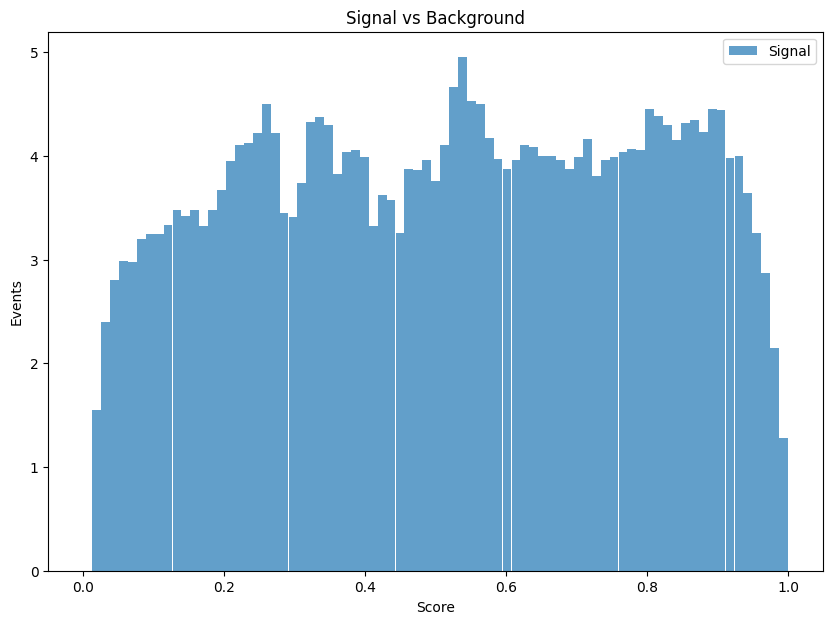

In [24]:
import matplotlib.pyplot as plt

# Define the edges of the bins; assumes nbins and the range are defined as in your script
bin_edges = np.linspace(xmin, xmax, 80)

# Calculate the bin centers from the edges for plotting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histograms
plt.figure(figsize=(10, 7))
plt.bar(bin_centers, sig_array, width=(xmax-xmin)/nbins, label='Signal', alpha=0.7)
plt.bar(bin_centers, bkg_array, width=(xmax-xmin)/nbins, label='Background', alpha=0.7)

# Add some plot labels and legend
plt.xlabel('Score')
plt.ylabel('Events')
plt.title('Signal vs Background')
plt.legend()

# Show the plot
plt.show()

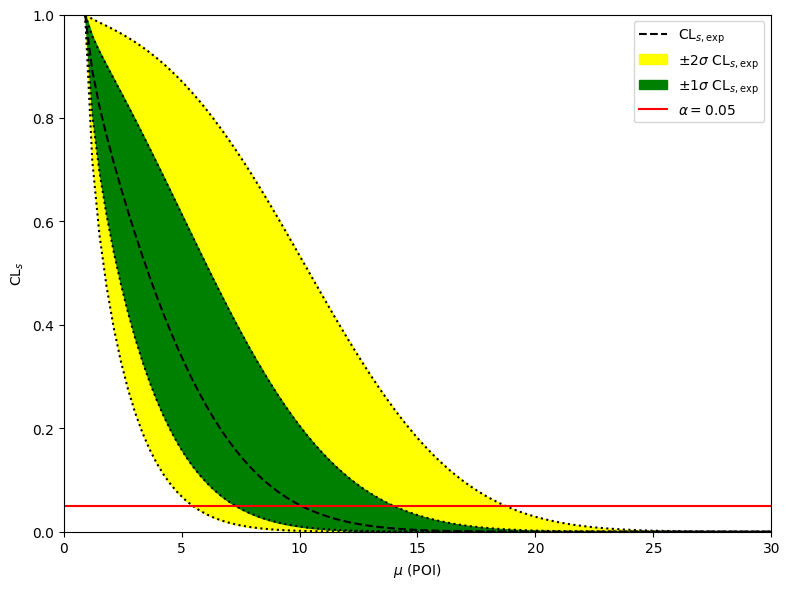

In [31]:
import matplotlib.pyplot as plt
import numpy as np
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Set the text rendering engine to LaTeX


# Extract the data from the cls_exp lines
cls_exp_data = [line.get_data() for line in artists.cls_exp]

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the third cls_exp line
ax.plot(cls_exp_data[2][0], cls_exp_data[2][1], linestyle='--', color='black', label=r"$\mathrm{CL}_{s,\mathrm{exp}}$")
ax.plot(cls_exp_data[0][0], cls_exp_data[0][1], linestyle=':', color='black')
ax.plot(cls_exp_data[1][0], cls_exp_data[1][1], linestyle=':', color='black')
ax.plot(cls_exp_data[3][0], cls_exp_data[3][1], linestyle=':', color='black')
ax.plot(cls_exp_data[4][0], cls_exp_data[4][1], linestyle=':', color='black')

# Plot the yellow band (area between the first and fifth cls_exp lines)
ax.fill_between(cls_exp_data[0][0], cls_exp_data[0][1], cls_exp_data[4][1], color='yellow', alpha=1, label=r"$\pm2\sigma~\mathrm{CL}_{s,\mathrm{exp}}$")
# Plot the green band (area between the second and fourth cls_exp lines)
ax.fill_between(cls_exp_data[1][0], cls_exp_data[1][1], cls_exp_data[3][1], color='green', alpha=1, label=r"$\pm1\sigma~\mathrm{CL}_{s,\mathrm{exp}}$")
ax.axhline(y=0.05, color='red', linestyle='-', linewidth=1.5, label=r"$\alpha=0.05$")

# Customize the plot
ax.set_xlabel(r"$\mu~\mathrm{(POI)}$")
ax.set_ylabel(r"$\mathrm{CL}_{s}$")
ax.set_xlim(min(cls_exp_data[2][0]), max(cls_exp_data[2][0]))
ax.set_ylim(0, 1)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
import ROOT
import numpy as np
import pyhf
from pyhf.contrib.viz import brazil
import matplotlib.pyplot as plt

# Open the ROOT files
sig_file = ROOT.TFile("sig_zh_lo_250GeV_14TeV_test_saved.root")
bkg_file = ROOT.TFile("bkg_zjets_lo_250GeV_14TeV_test_saved.root")

sig_tree = sig_file.Get("HistData")

# Get the TLeaf object
sig_hmass_leaf = sig_tree.GetLeaf("hmass")

# Create a histogram with a specific range
sig_hist = ROOT.TH1F("sig_hmass_hist", "Histogram of hmass (100-150)", 15, 100, 150)

# Fill the histogram with the data from the TLeaf within the specified range
for i in range(sig_tree.GetEntries()):
    sig_tree.GetEntry(i)
    sig_hmass_value = sig_hmass_leaf.GetValue()
    if 100 <= sig_hmass_value <= 150:
        sig_hist.Fill(sig_hmass_value)

bkg_tree = bkg_file.Get("HistData")

# Get the TLeaf object
bkg_hmass_leaf = bkg_tree.GetLeaf("hmass")

# Create a histogram with a specific range
bkg_hist = ROOT.TH1F("bkg_hmass_hist", "Histogram of hmass (100-150)", 15, 100, 150)

# Fill the histogram with the data from the TLeaf within the specified range
for i in range(bkg_tree.GetEntries()):
    bkg_tree.GetEntry(i)
    bkg_hmass_value = bkg_hmass_leaf.GetValue()
    if 100 <= bkg_hmass_value <= 150:
        bkg_hist.Fill(bkg_hmass_value)

nbins = 100
xmin = 100
xmax = 150

# # Rebin the histograms with the same binning
# sig_hist.Rebin(nbins, f"sig_rebinned", np.linspace(xmin, xmax, nbins + 1))
# bkg_hist.Rebin(nbins, f"bkg_rebinned", np.linspace(xmin, xmax, nbins + 1))

# Extract the bin contents into NumPy arrays
sig_array = np.zeros(nbins)
bkg_array = np.zeros(nbins)
sig_array_unc = np.zeros(nbins)
bkg_array_unc = np.zeros(nbins)

sigWeight = 0.0031132
bkgWeight = 92.79567345
for i in range(1, nbins + 1):
    sig_array[i - 1] = sig_hist.GetBinContent(i) * sigWeight
    bkg_array[i - 1] = bkg_hist.GetBinContent(i) * bkgWeight
    sig_array_unc[i - 1] = np.sqrt(sig_hist.GetBinContent(i) * sigWeight)
    bkg_array_unc[i - 1] = np.sqrt(bkg_hist.GetBinContent(i) * bkgWeight)
epsilon = 1e-9
bkg_array = np.asarray(bkg_array) + epsilon
def sample_sig_bkg(sig_mu, sig_unc, bkg_mu, bkg_unc):
    """Create sample data by sampling signal and background from mu, sigma.

    Assumes normal distribution for sampling.
    """
    res = []
    for mu1, sig1, mu2, sig2 in zip(sig_mu, sig_unc, bkg_mu, bkg_unc):
        val = np.random.normal(mu1, sig1) + np.random.normal(mu2, sig2)
        val = max(val, 1e-9)
        res.append(val)
    return res

model = pyhf.simplemodels.uncorrelated_background(
    signal=sig_array,
    bkg=bkg_array,
    bkg_uncertainty=bkg_array_unc,
)

sum_sig = np.sum(sig_array)
print("sig total:", sum_sig)

sum_bkg = np.sum(bkg_array)
print("bkg total:", sum_bkg)

#print(sig_array)
#print(bkg_array)
data = sample_sig_bkg(
    sig_array, sig_array_unc, bkg_array, bkg_array_unc
)
data = pyhf.tensorlib.astensor(data+ model.config.auxdata)

#print(data)

mu_tests = np.linspace(0, 50, 40)
(
    obs_limit,
    exp_limits,
    (poi_tests, tests),
) = pyhf.infer.intervals.upper_limits.upper_limit(
    data, model, mu_tests, level=0.05, return_results=True,
    par_bounds= [(0,50)]
)

print(obs_limit)
print(exp_limits)
fig, ax = plt.subplots(figsize=(10, 7))
artists = brazil.plot_results(mu_tests, tests, test_size=0.05, ax=ax)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Set the text rendering engine to LaTeX


# Extract the data from the cls_exp lines
cls_exp_data = [line.get_data() for line in artists.cls_exp]

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the third cls_exp line
ax.plot(cls_exp_data[2][0], cls_exp_data[2][1], linestyle='--', color='black', label=r"$\mathrm{CL}_{s,\mathrm{exp}}$")
ax.plot(cls_exp_data[0][0], cls_exp_data[0][1], linestyle=':', color='black')
ax.plot(cls_exp_data[1][0], cls_exp_data[1][1], linestyle=':', color='black')
ax.plot(cls_exp_data[3][0], cls_exp_data[3][1], linestyle=':', color='black')
ax.plot(cls_exp_data[4][0], cls_exp_data[4][1], linestyle=':', color='black')

# Plot the yellow band (area between the first and fifth cls_exp lines)
ax.fill_between(cls_exp_data[0][0], cls_exp_data[0][1], cls_exp_data[4][1], color='yellow', alpha=1, label=r"$\pm2\sigma~\mathrm{CL}_{s,\mathrm{exp}}$")
# Plot the green band (area between the second and fourth cls_exp lines)
ax.fill_between(cls_exp_data[1][0], cls_exp_data[1][1], cls_exp_data[3][1], color='green', alpha=1, label=r"$\pm1\sigma~\mathrm{CL}_{s,\mathrm{exp}}$")
ax.axhline(y=0.05, color='red', linestyle='-', linewidth=1.5, label=r"$\alpha=0.05$")

# Customize the plot
ax.set_xlabel(r"$\mu~\mathrm{(POI)}$")
ax.set_ylabel(r"$\mathrm{CL}_{s}$")
ax.set_xlim(min(cls_exp_data[2][0]), max(cls_exp_data[2][0]))
ax.set_ylim(0, 1)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()